In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
%matplotlib inline

In [2]:
def crawl_folder(folder_path): #search_str 찾고자 하는 string 
    search_path_list=[]
    fileList = os.walk(folder_path).next()[2]
    subFolder_list = os.walk(folder_path).next()[1]
    if(len(fileList)!=0):
        for j in range(len(fileList)):
            search_path_list.append(folder_path+'/'+fileList[j])
    if len(subFolder_list)==0:
        return search_path_list
    else: 
        for i in range(len(subFolder_list)):
            search_path_list.extend(crawl_folder(folder_path+'/'+subFolder_list[i] ))
        return search_path_list

In [7]:
path = 'D:\\data\\ASAN\\benign_no_edge\\benign_crop_from_down\\'

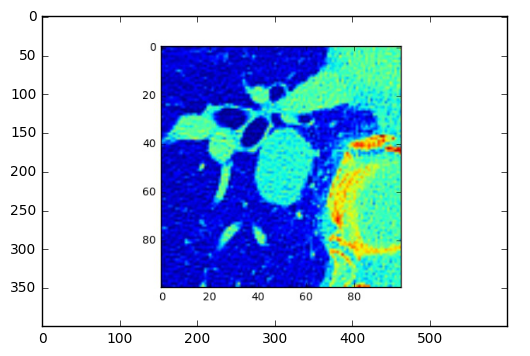

In [8]:
for path_ in (crawl_folder(path)):
    path_
img=plt.imread(path_)
plt.imshow(img)

In [9]:
def cut_edge(path,row,col):
    img=Image.open(path)
    np_img=np.asarray(img)
    img_row,img_col , img_chs=np.shape(np_img)
    res_img = np_img[int(img_row/2)-int(row/2) :int(img_row)/2+int(row/2) , \
               int(img_col/2)-int(col/2) :int(img_col)/2+int(col/2),:]
    return res_img

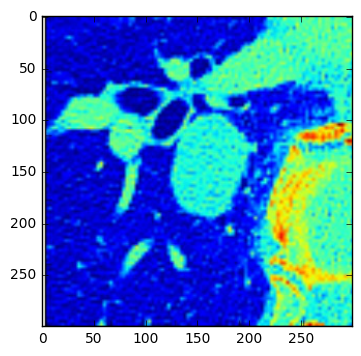

In [10]:
cut_img=cut_edge(path_ , 300,300 )
plt.imshow(cut_img)

In [32]:
def cut_edge_all_files(folder_path , save_folder ,  row , col , extension):
    """
    usage: 
    save_folder //save//path// 
    """
    paths=crawl_folder(folder_path)
    for path in paths:
        name = path.split('/')[-1].split('.')[0]
        cut_img=cut_edge(path , row ,col )
        pil_img=Image.fromarray(cut_img)
        pil_img.save(save_folder + name+'.'+extension)

In [33]:
save_path = 'D:\\data\\ASAN\\benign_no_edge\\benign_crop_from_down\\'
folder_path = 'D:\\data\\ASAN\\benign_with_edge\\benign_crop_from_down\\'

cut_edge_all_files(folder_path , save_path ,300 , 300 , extension='jpeg')

In [34]:
folder_path ='D:\\data\\ASAN\\benign_with_edge\\benign_crop_from_mask\\'
save_path = 'D:\\data\\ASAN\\benign_no_edge\\benign_crop_from_mask\\'
cut_edge_all_files(folder_path , save_path ,300 , 300 , extension='jpeg')

In [35]:
folder_path ='D:\\data\\ASAN\\benign_with_edge\\benign_crop_from_up\\'
save_path = 'D:\\data\\ASAN\\benign_no_edge\\benign_crop_from_up\\'
cut_edge_all_files(folder_path , save_path ,300 , 300 , extension='jpeg')

In [39]:
folder_path ='D:\\data\\ASAN\\benign_with_edge\\benign_from_up\\'
save_path = 'D:\\data\\ASAN\\benign_no_edge\\benign_from_up\\'
cut_edge_all_files(folder_path , save_path ,300 , 300 , extension='jpeg')

In [37]:
folder_path ='D:\\data\\ASAN\\benign_with_edge\\benign_from_down\\'
save_path = 'D:\\data\\ASAN\\benign_no_edge\\benign_from_down\\'
cut_edge_all_files(folder_path , save_path ,300 , 300 , extension='jpeg')

In [38]:
folder_path ='D:\\data\\ASAN\\benign_with_edge\\benign_from_mask\\'
save_path = 'D:\\data\\ASAN\\benign_no_edge\\benign_from_mask\\'
cut_edge_all_files(folder_path , save_path ,300 , 300 , extension='jpeg')